In [1]:

list_of_packages <- c("ggplot2", "dplyr", "DESeq2","biomaRt","tidyr", "tidyverse")
for(package in list_of_packages){
suppressPackageStartupMessages(suppressMessages(suppressWarnings(library(package,character.only=TRUE))))
}

In [2]:
figures_dir<-file.path("../figures")
if(!dir.exists(figures_dir)){
 dir.create(figures_dir, showWarnings = FALSE, recursive = TRUE)
}

In [3]:
file_path <- file.path("../data/U118mg/merged_dataset_long.parquet")
merged_dataset <- arrow::read_parquet(file_path)

In [4]:
# filter for only GSDMD and GSDME
merged_dataset <- merged_dataset %>% filter(hgnc_symbol %in% c(
    'GSDMA',
    'GSDMB',
    'GSDMC',
    'GSDMD',
    'GSDME',
    'TLR4',
    'TLR5',
    'CASP1',
    'CASP3',
    'CASP7'
))
merged_dataset$hgnc_symbol <- factor(merged_dataset$hgnc_symbol, levels = c(
    'GSDMA',
    'GSDMB',
    'GSDMC',
    'GSDMD',
    'GSDME',
    'TLR4',
    'TLR5',
    'CASP1',
    'CASP3',
    'CASP7'
))

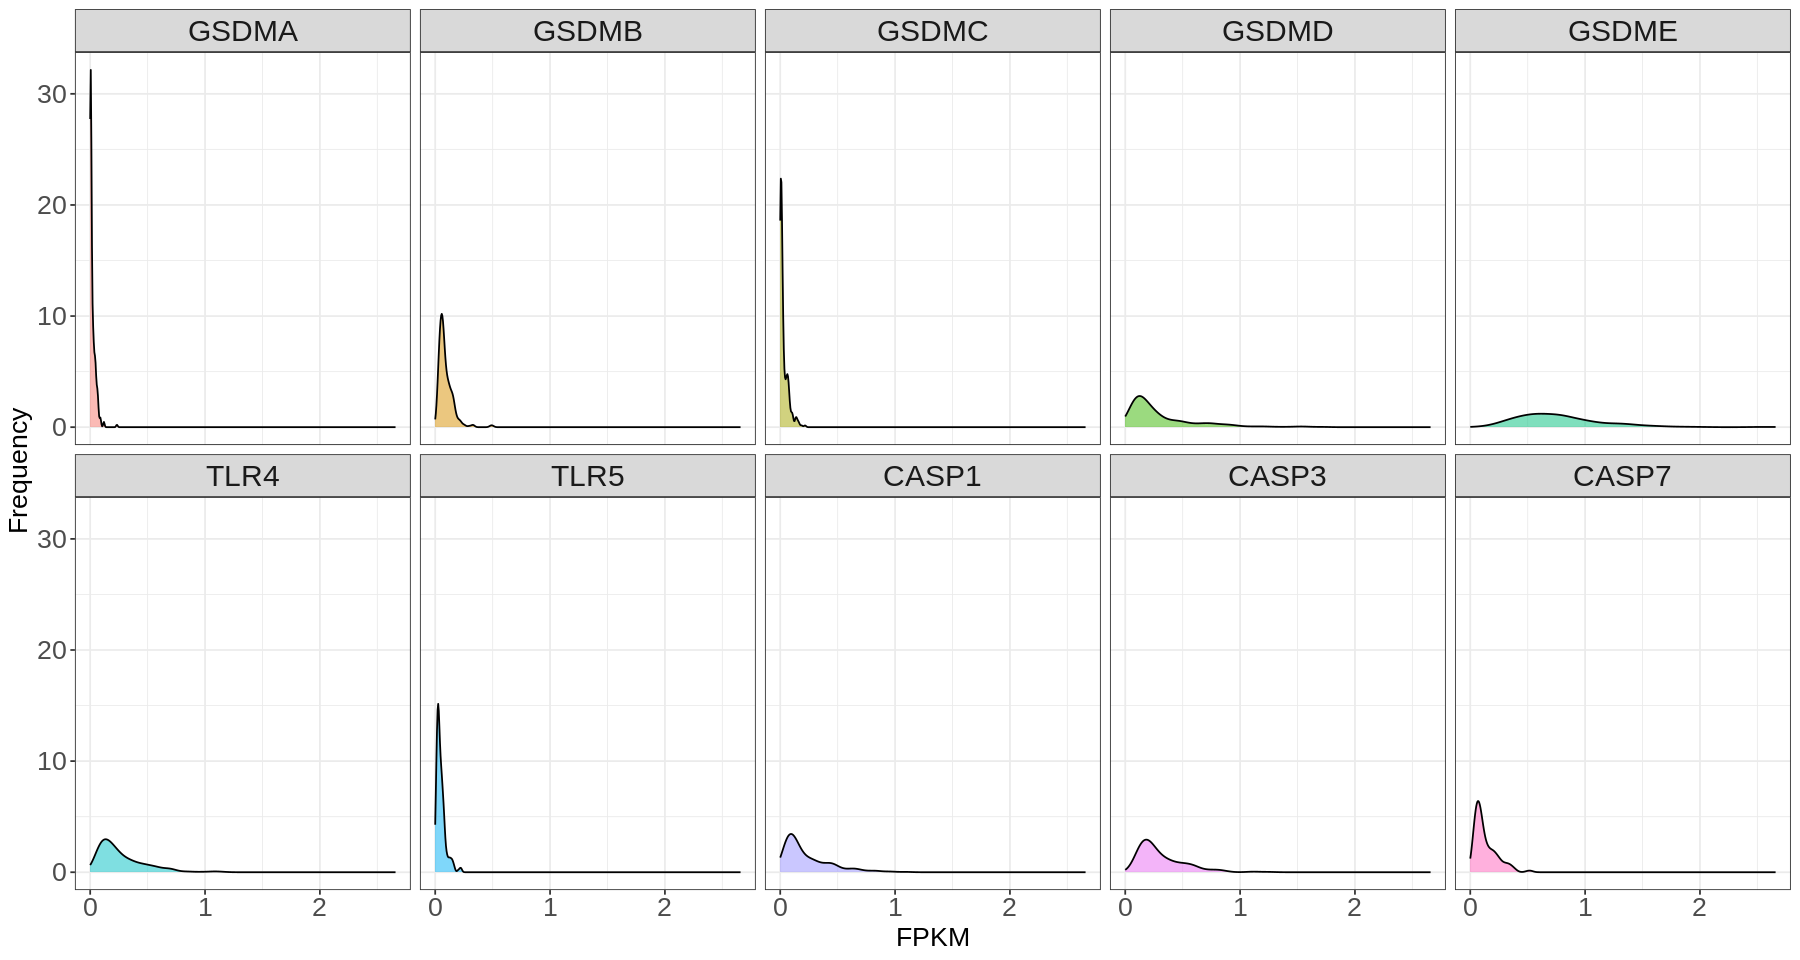

In [5]:
width <- 15
height <- 8
options(repr.plot.width=width, repr.plot.height=height)
# plot the histogram of the mean fpkm for each gene
all_genes_plot <- (
    ggplot(merged_dataset, aes(x=fpkm, fill=hgnc_symbol)) 
    + geom_density(alpha=0.5)
    + theme_bw() 
    + theme(legend.position="inside", legend.position.inside = c(0.9, 0.9))
    + labs(x="FPKM", y="Frequency",color="Gene")
    + theme(
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.text = element_text(size = 16),
        legend.title = element_text(size = 16),
        strip.text = element_text(size = 18),
    )
    + labs(fill="Gene")
    + facet_wrap(~hgnc_symbol, ncol=5)
    + theme(legend.position = "none")
)
# save the plot
ggsave(file.path(figures_dir, "all_genes_fpkm_density_plot.png"), all_genes_plot, width=width, height=height, dpi=600)
all_genes_plot

In [6]:
# filter for only GSDMD and GSDME
merged_dataset <- merged_dataset %>% filter(hgnc_symbol %in% c("GSDMD", "GSDME"))

In [7]:
# get the mean for where u118mg is true 
merged_dataset %>% filter(u118mg == TRUE) %>% group_by(sample,hgnc_symbol )

entrezgene_id,hgnc_symbol,transcript_length,sample,fpkm,u118mg
<chr>,<fct>,<dbl>,<chr>,<dbl>,<lgl>
1687,GSDME,1473.786,GSM4610662,0.69413076,TRUE
1687,GSDME,1473.786,GSM4610663,0.73348519,TRUE
79792,GSDMD,1367.353,GSM4610662,0.07093999,TRUE
79792,GSDMD,1367.353,GSM4610663,0.05923855,TRUE


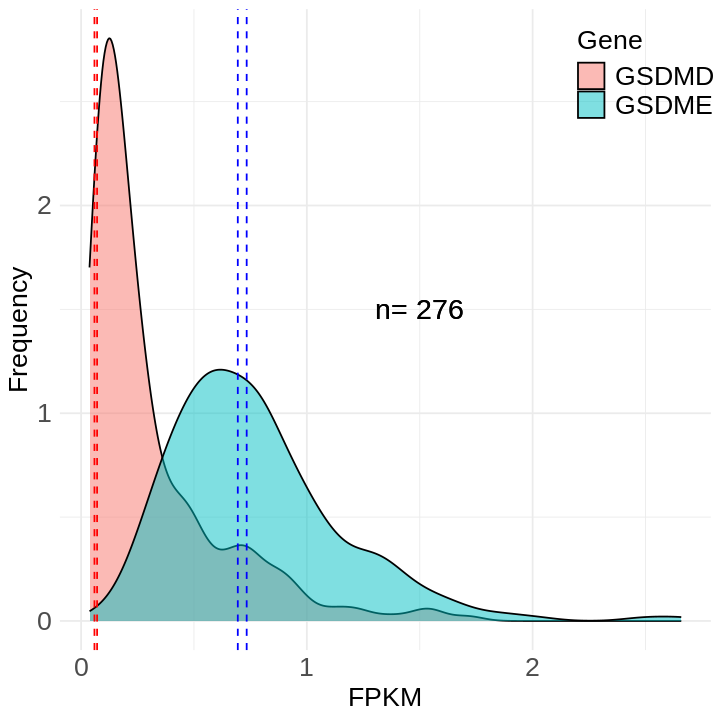

In [8]:
width <- 6
height <- 6
options(repr.plot.width=width, repr.plot.height=height)
# plot the histogram of the mean fpkm for each gene
p <- (
    ggplot(merged_dataset, aes(x=fpkm, fill=hgnc_symbol)) 
    + geom_density(alpha=0.5)
    + theme_minimal() 
    + theme(legend.position="inside", legend.position.inside = c(0.9, 0.9))
    + labs(x="FPKM", y="Frequency",color="Gene")
    + theme(
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.text = element_text(size = 16),
        legend.title = element_text(size = 16),
    )
    # annotate the number of samples for each gene
    + geom_text(
        aes(x=1.5, y=1.5, label=paste("n=", length(unique(merged_dataset$sample))), group=hgnc_symbol),
        color="black",
        size=6,
        data=merged_dataset %>% group_by(hgnc_symbol) %>% summarise()
    )
    + labs(fill="Gene")
    # drawe vertical lines for where umg118mg is true
    + geom_vline(xintercept = 0.05923855	, linetype="dashed", color="red")
    + geom_vline(xintercept = 0.07093999, linetype="dashed", color="red")
    + geom_vline(xintercept = 0.69413076, linetype="dashed", color="blue")
    + geom_vline(xintercept = 0.73348519, linetype="dashed", color="blue")

)
# save the plot
ggsave(file.path(figures_dir, "GSDMD_GSDME_fpkm_density_plot.png"), p, width=width, height=height, dpi=600)
p